In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc
from scipy.stats import variation

In [12]:
rnaseq_data = pd.read_csv("gene_exp.gct", skiprows = 2, sep="\t")
methylation_data = pd.read_csv('methylation.gct', skiprows = 2, sep="\t")
proteomics_data = pd.read_csv('proteomics.gct', skiprows = 2, sep="\t")

/var/folders/q9/1w3bs32d6wb1c2s8zkkch0hc0000gn/T/ipykernel_62991/3271101617.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [13]:
rnaseq_data=rnaseq_data.set_index('id')
methylation_data=methylation_data.set_index('id')
proteomics_data=proteomics_data.set_index('id')
rnaseq_data=rnaseq_data.T
methylation_data=methylation_data.T
proteomics_data=proteomics_data.T
rnaseq_data= rnaseq_data.set_index('participant_id')
methylation_data=methylation_data.set_index('participant_id')
proteomics_data=proteomics_data.set_index('participant_id')
rnaseq_data=rnaseq_data.drop('na')
methylation_data=methylation_data.drop('na')
proteomics_data=proteomics_data.drop('na')

In [15]:
rnaseq_data=rnaseq_data.drop(columns=rnaseq_data.columns[1:133]) #shape: 1212x18302
methylation_data=methylation_data.drop(columns=methylation_data.columns[1:133]) #shape: 885x20107
proteomics_data=proteomics_data.drop(columns=proteomics_data.columns[1:133]) # shape: 936x227

In [16]:
common_indexes = rnaseq_data.index.intersection(methylation_data.index).intersection(proteomics_data.index)

# Subset the dataframes using the common index values
rnaseq_subset = pd.DataFrame(rnaseq_data.loc[common_indexes])
methylation_subset =pd.DataFrame(methylation_data.loc[common_indexes])
proteomics_subset = pd.DataFrame(proteomics_data.loc[common_indexes])

# Check the resulting subsets of dataframes
print(rnaseq_subset)
print(methylation_subset)
print(proteomics_subset)

id                      sample_type    A1BG     A2BP1   A2LD1    A2ML1  \
participant_id                                                           
aalk            Primary solid Tumor  7.6000       NaN  6.0000  0.70000   
aaak            Primary solid Tumor  8.1000    1.9000  7.3000   1.8000   
aat1            Primary solid Tumor  7.7000       NaN  6.7000   2.0000   
a9qa            Primary solid Tumor  8.3000  -0.90000  7.9000      NaN   
a0sf            Primary solid Tumor  8.3000   -1.2000  7.3000   1.8000   
...                             ...     ...       ...     ...      ...   
a86g            Primary solid Tumor  9.1000    2.4000  5.9000  0.50000   
ab41            Primary solid Tumor  6.9000    2.2000  8.3000      NaN   
a899            Primary solid Tumor  7.8000   -1.3000  7.0000  -1.3000   
a8r5            Primary solid Tumor  8.8000  -0.70000  6.3000   1.3000   
a8r6            Primary solid Tumor  8.0000       NaN  4.7000   2.1000   

id                 A2M  A4GALT     A4

In [17]:
rnaseq_subset = rnaseq_subset.replace({'Primary solid Tumor':0,'Solid Tissue Normal':1,'Metastatic':2})
methylation_subset = methylation_subset.replace({'Primary solid Tumor':0,'Solid Tissue Normal':1,'Metastatic':2})
proteomics_subset = proteomics_subset.replace({'Primary solid Tumor':0,'Solid Tissue Normal':1,'Metastatic':2})

In [18]:
rnaseq_subset_new = rnaseq_subset[~ rnaseq_subset.index.duplicated(keep='first')]
methylation_subset_new = methylation_subset[~ methylation_subset.index.duplicated(keep='first')]
proteomics_subset_new = proteomics_subset[~ proteomics_subset.index.duplicated(keep='first')]

In [19]:
rnaseq_subset_new = rnaseq_subset_new.fillna(rnaseq_subset_new.mean())
methylation_subset_new = methylation_subset_new.fillna(methylation_subset_new.mean())
proteomics_subset_new = proteomics_subset_new.fillna(proteomics_subset_new.mean())

/var/folders/q9/1w3bs32d6wb1c2s8zkkch0hc0000gn/T/ipykernel_62991/110932236.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rnaseq_subset_new = rnaseq_subset_new.fillna(rnaseq_subset_new.mean())
/var/folders/q9/1w3bs32d6wb1c2s8zkkch0hc0000gn/T/ipykernel_62991/110932236.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  methylation_subset_new = methylation_subset_new.fillna(methylation_subset_new.mean())
/var/folders/q9/1w3bs32d6wb1c2s8zkkch0hc0000gn/T/ipykernel_62991/110932236.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select onl

In [20]:
rnaseq_subset_new['sample_type'] = rnaseq_subset_new['sample_type'].astype(int)
methylation_subset_new['sample_type'] = methylation_subset_new['sample_type'].astype(int)
proteomics_subset_new['sample_type'] = proteomics_subset_new['sample_type'].astype(int)

In [29]:
rnaseq_subset_new = rnaseq_subset_new.astype(float)
methylation_subset_new = methylation_subset_new.astype(float)
proteomics_subset_new = proteomics_subset_new.astype(float)

In [30]:
gene_df = rnaseq_subset_new.drop(rnaseq_subset_new[rnaseq_subset_new['sample_type'] == 2].index)
methyl_df  = methylation_subset_new.drop(methylation_subset_new[methylation_subset_new['sample_type'] == 2].index)
prot_df = proteomics_subset_new.drop(proteomics_subset_new[proteomics_subset_new['sample_type'] == 2].index)

(array([4.000000e+00, 1.200000e+01, 1.000000e+01, 1.600000e+01,
        1.100000e+01, 3.500000e+01, 3.800000e+01, 6.900000e+01,
        1.060000e+02, 1.570000e+02, 6.091000e+03, 1.226150e+05,
        1.283200e+05, 2.597640e+05, 3.174840e+05, 2.996210e+05,
        2.714500e+05, 2.690220e+05, 2.617780e+05, 2.722260e+05,
        2.819660e+05, 2.977400e+05, 3.233750e+05, 3.578630e+05,
        4.045340e+05, 3.905350e+05, 5.614490e+05, 7.039860e+05,
        8.698480e+05, 1.010319e+06, 1.068242e+06, 1.011354e+06,
        8.203850e+05, 5.614800e+05, 3.427530e+05, 2.011720e+05,
        1.151230e+05, 5.627500e+04, 3.900600e+04, 2.058900e+04,
        1.060400e+04, 5.330000e+03, 2.701000e+03, 1.239000e+03,
        4.860000e+02, 1.970000e+02, 6.900000e+01, 2.700000e+01,
        1.600000e+01, 7.000000e+00]),
 array([-8.6  , -8.008, -7.416, -6.824, -6.232, -5.64 , -5.048, -4.456,
        -3.864, -3.272, -2.68 , -2.088, -1.496, -0.904, -0.312,  0.28 ,
         0.872,  1.464,  2.056,  2.648,  3.24 ,  3

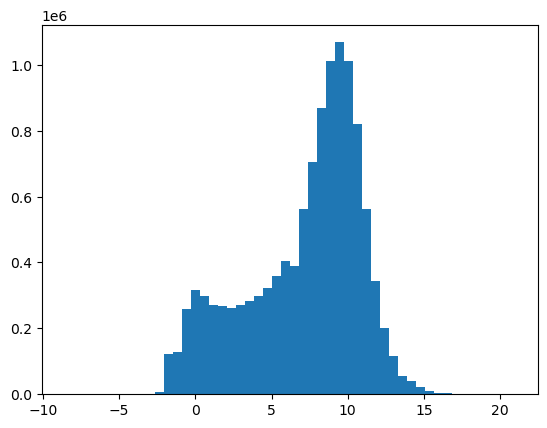

In [45]:
plt.hist(gene_df.values.flatten(), bins = 50)

(array([ 13435., 192511., 190260., 184534., 292790., 347472., 382663.,
        404681., 427257., 427565., 420089., 421482., 407979., 387610.,
        378103., 362148., 354601., 339805., 326030., 317221., 318909.,
        321188., 311586., 297112., 143269., 280441., 276204., 267580.,
        262433., 255775., 247126., 241070., 233832., 225828., 220727.,
        215295., 210462., 210803., 206744., 202298., 195406., 192210.,
        188603., 183604., 174774., 160415., 126593.,  66781.,  10470.,
          1840.]),
 array([0.01  , 0.0296, 0.0492, 0.0688, 0.0884, 0.108 , 0.1276, 0.1472,
        0.1668, 0.1864, 0.206 , 0.2256, 0.2452, 0.2648, 0.2844, 0.304 ,
        0.3236, 0.3432, 0.3628, 0.3824, 0.402 , 0.4216, 0.4412, 0.4608,
        0.4804, 0.5   , 0.5196, 0.5392, 0.5588, 0.5784, 0.598 , 0.6176,
        0.6372, 0.6568, 0.6764, 0.696 , 0.7156, 0.7352, 0.7548, 0.7744,
        0.794 , 0.8136, 0.8332, 0.8528, 0.8724, 0.892 , 0.9116, 0.9312,
        0.9508, 0.9704, 0.99  ]),
 <BarContainer obj

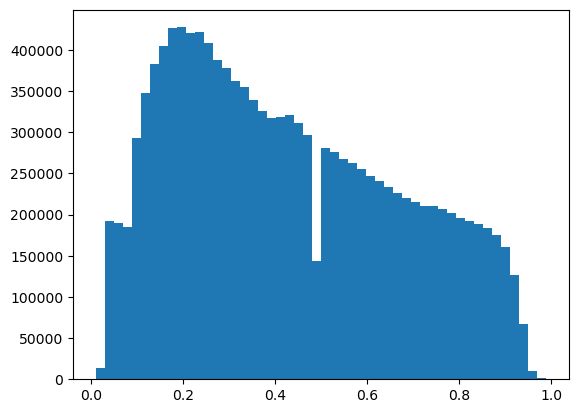

In [46]:
plt.hist(methyl_df.values.flatten(), bins = 50)

(array([3.0000e+00, 0.0000e+00, 4.0000e+00, 9.0000e+00, 1.0000e+01,
        1.0000e+01, 5.0000e+00, 1.1000e+01, 1.0000e+01, 2.3000e+01,
        3.0000e+01, 4.8000e+01, 6.4000e+01, 9.4000e+01, 1.4200e+02,
        2.6200e+02, 3.8900e+02, 6.9000e+02, 1.1560e+03, 2.2530e+03,
        4.5480e+03, 1.0517e+04, 2.4814e+04, 4.2516e+04, 2.6112e+04,
        1.2660e+04, 6.6310e+03, 3.2770e+03, 1.9630e+03, 1.0580e+03,
        6.4600e+02, 4.3700e+02, 2.8600e+02, 1.7300e+02, 1.4400e+02,
        7.7000e+01, 7.0000e+01, 4.8000e+01, 2.6000e+01, 2.0000e+01,
        1.3000e+01, 9.0000e+00, 4.0000e+00, 5.0000e+00, 5.0000e+00,
        1.0000e+00, 6.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-5.99  , -5.7362, -5.4824, -5.2286, -4.9748, -4.721 , -4.4672,
        -4.2134, -3.9596, -3.7058, -3.452 , -3.1982, -2.9444, -2.6906,
        -2.4368, -2.183 , -1.9292, -1.6754, -1.4216, -1.1678, -0.914 ,
        -0.6602, -0.4064, -0.1526,  0.1012,  0.355 ,  0.6088,  0.8626,
         1.1164,  1.3702,  1.624 ,

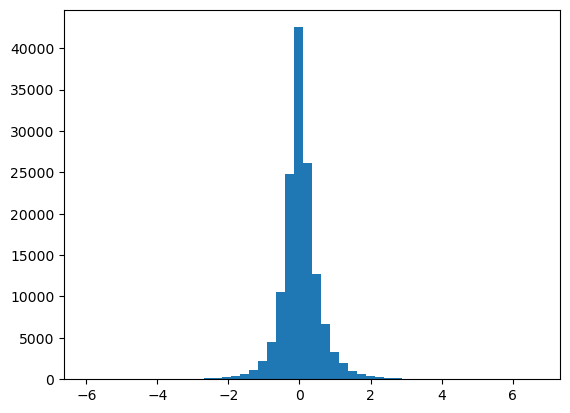

In [47]:
plt.hist(prot_df.values.flatten(), bins = 50)

In [31]:
gene_sample = gene_df['sample_type']
methyl_sample = methyl_df ['sample_type']
prot_sample = prot_df['sample_type']

In [32]:
gene_df = gene_df.drop(columns = 'sample_type')
methyl_df = methyl_df.drop(columns = 'sample_type')
prot_df = prot_df.drop(columns = 'sample_type')

In [33]:
# compute normalization factor
gene_counts = gene_df.sum(axis=1)
norm_factor = gene_counts / np.median(gene_counts)

# normalize data
df_norm_gene = gene_df / norm_factor[:, None]

/var/folders/q9/1w3bs32d6wb1c2s8zkkch0hc0000gn/T/ipykernel_62991/1847385111.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_norm_gene = gene_df / norm_factor[:, None]


/var/folders/q9/1w3bs32d6wb1c2s8zkkch0hc0000gn/T/ipykernel_62991/2073347762.py:5: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  Adata_gene = sc.AnnData(df_norm_gene)
/Users/fenisha/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


(array([1.000000e+00, 3.000000e+00, 0.000000e+00, 1.000000e+00,
        4.000000e+00, 7.000000e+00, 1.400000e+01, 2.700000e+01,
        6.200000e+01, 1.190000e+02, 2.240000e+02, 4.960000e+02,
        1.047000e+03, 2.333000e+03, 5.990000e+03, 1.599000e+04,
        4.585900e+04, 1.468340e+05, 4.789980e+05, 1.121669e+06,
        1.937300e+06, 2.985114e+06, 2.212611e+06, 1.449100e+06,
        7.169200e+05, 2.958690e+05, 1.144740e+05, 4.409300e+04,
        1.775900e+04, 7.271000e+03, 3.230000e+03, 1.582000e+03,
        8.370000e+02, 4.830000e+02, 3.050000e+02, 1.740000e+02,
        1.160000e+02, 6.800000e+01, 4.100000e+01, 2.700000e+01,
        1.800000e+01, 1.800000e+01, 1.800000e+01, 1.000000e+01,
        9.000000e+00, 5.000000e+00, 1.000000e+00, 0.000000e+00,
        2.000000e+00, 1.000000e+00]),
 array([-11.788121  , -11.246512  , -10.704905  , -10.163296  ,
         -9.621688  ,  -9.080079  ,  -8.538471  ,  -7.9968624 ,
         -7.455254  ,  -6.9136457 ,  -6.3720374 ,  -5.830429  ,
  

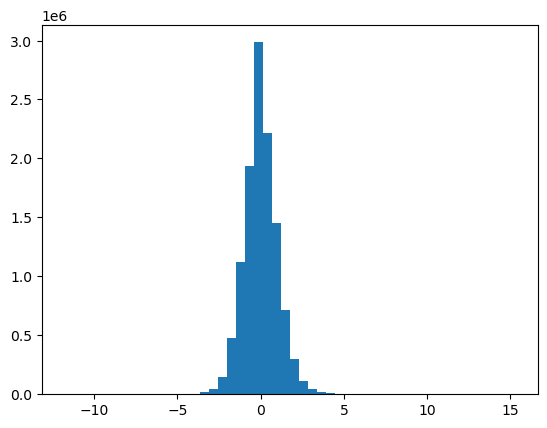

In [34]:
#adata = ad.AnnData(X=df_norm.values, obs=df_norm.index, var=df_norm.columns)
Adata_gene = sc.AnnData(df_norm_gene)
sc.pp.scale(Adata_gene)
df_gene = Adata_gene.to_df()
df_gene.dropna(axis =1, inplace = True)
# print the anndata object
plt.hist(df_gene.values.flatten(), bins = 50)

In [35]:
#methyl_df = methyl_df.reset_index(drop=True)
methyl_counts = methyl_df.sum(axis=1)
norm_factor = methyl_counts / np.median(methyl_counts)

# normalize data
df_norm_methyl = np.log1p(methyl_df / norm_factor[:, None])

/var/folders/q9/1w3bs32d6wb1c2s8zkkch0hc0000gn/T/ipykernel_62991/1146858922.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_norm_methyl = np.log1p(methyl_df / norm_factor[:, None])


/var/folders/q9/1w3bs32d6wb1c2s8zkkch0hc0000gn/T/ipykernel_62991/347488924.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  Adata_methyl = sc.AnnData(df_norm_methyl)


(array([4.000000e+00, 2.000000e+00, 8.000000e+00, 1.600000e+01,
        3.300000e+01, 4.900000e+01, 9.400000e+01, 2.060000e+02,
        4.070000e+02, 7.950000e+02, 1.684000e+03, 3.538000e+03,
        8.544000e+03, 2.252800e+04, 6.733900e+04, 2.219000e+05,
        8.495460e+05, 2.747442e+06, 4.263001e+06, 3.092693e+06,
        1.090602e+06, 3.103340e+05, 9.387100e+04, 3.057900e+04,
        1.113100e+04, 4.553000e+03, 1.927000e+03, 9.830000e+02,
        5.940000e+02, 3.530000e+02, 2.420000e+02, 1.710000e+02,
        1.280000e+02, 1.040000e+02, 7.700000e+01, 5.800000e+01,
        3.700000e+01, 3.300000e+01, 2.700000e+01, 2.400000e+01,
        1.500000e+01, 1.300000e+01, 1.100000e+01, 2.000000e+00,
        4.000000e+00, 4.000000e+00, 1.000000e+00, 1.000000e+00,
        3.000000e+00, 3.000000e+00]),
 array([-13.873797  , -13.127888  , -12.381977  , -11.636067  ,
        -10.890158  , -10.144248  ,  -9.398337  ,  -8.652428  ,
         -7.906518  ,  -7.160608  ,  -6.414698  ,  -5.668788  ,
  

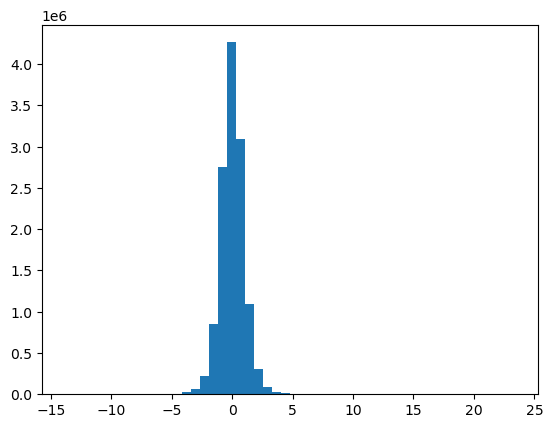

In [36]:
Adata_methyl = sc.AnnData(df_norm_methyl)
sc.pp.scale(Adata_methyl)
df_methyl = Adata_methyl.to_df()
df_methyl.dropna(axis =1, inplace = True)
# print the anndata object
plt.hist(df_methyl.values.flatten(), bins = 50)

/var/folders/q9/1w3bs32d6wb1c2s8zkkch0hc0000gn/T/ipykernel_62991/33941322.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_norm_prot = np.log1p(prot_df / prot_norm_factor[:, None])
/Users/fenisha/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 8.0000e+00, 5.0000e+00, 3.0000e+00,
        4.0000e+00, 2.1000e+01, 2.2000e+01, 3.3000e+01, 4.4000e+01,
        6.9000e+01, 9.4000e+01, 1.2600e+02, 1.9300e+02, 3.0000e+02,
        4.1800e+02, 6.7200e+02, 1.0400e+03, 1.8190e+03, 3.8460e+03,
        1.1886e+04, 5.9258e+04, 3.3388e+04, 9.7960e+03, 3.8670e+03,
        1.8400e+03, 9.8300e+02, 5.7100e+02, 4.2300e+02, 3.2700e+02,
        2.3900e+02, 2.0000e+02, 1.5700e+02, 1.1600e+02, 1.1400e+02,
        9.0000e+01, 5.5000e+01, 5.6000e+01, 4.4000e+01, 2.8000e+01,
        1.8000e+01, 9.0000e+00, 5.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-9.09099361, -8.7511523 , -8.411311  , -8.07146969, -7.73162838,
        -7.39178707, -7.05194576, -6.71210445, -6.37226314, -6.03242183,
        -5.69258052, -5.35273921, -5.0128979 , -4.67305659, -4.33321528,
        -3.99337397, -3.65353266, -3.31369135, -2.97385004, -2.63400873,
        -2.29416742, -1.95

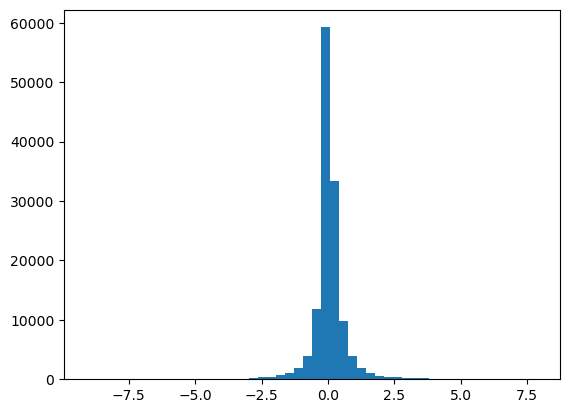

In [37]:
prot_counts = prot_df.sum(axis=1)
prot_norm_factor = prot_counts / np.median(prot_counts)

# normalize data
df_norm_prot = np.log1p(prot_df / prot_norm_factor[:, None])
plt.hist(df_norm_prot.values.flatten(), bins = 50)

In [43]:
# compute variance and mean
variance = np.var(df_norm_gene, axis=0, ddof=1)
mean = np.mean(df_norm_gene, axis=0)

# select highly variable genes
hv_genes = np.logical_and(variance > np.percentile(variance, 95), mean > 0)
hvg = df_norm_gene.loc[:, hv_genes]
hvg = hvg.fillna(hvg.mean())

# output results
print(hvg.shape)

(638, 915)


In [41]:
# compute variance and mean
variance_methyl = np.var(df_norm_methyl, axis=0, ddof=1)
mean_methyl = np.mean(df_norm_methyl, axis=0)

# select highly variable genes
hv_methyl = np.logical_and(variance_methyl > np.percentile(variance_methyl, 95), mean_methyl > 0)
#np.percentile(variance_methyl, 95) calculates the 95th percentile of the variance values in the variance_methyl array.
#This gives us a threshold above which values are considered "high variance".
#variance_methyl > np.percentile(variance_methyl, 95) returns a boolean mask where True values indicate that a given 
#variance value is greater than the 95th percentile threshold. mean_methyl > 0 returns a boolean mask where True 
#values indicate that a given mean value is greater than 0. This is used to filter out any probes with low or no methylation.
#np.logical_and() combines these two boolean masks using a logical AND operation, so that only the rows where both conditions 
#are True are kept. The resulting boolean mask is assigned to hv_methyl, which can be used to filter the original DataFrame

hvm = df_norm_methyl.loc[:, hv_methyl]
hvm = hvm.fillna(hvm.mean())
# output results
print(hvm.shape)

(638, 1006)


In [42]:
print(df_norm_prot.shape)

(638, 226)


In [44]:
hvg.to_csv('final_gene.txt', sep='\t', index=True, header=True)
hvm.to_csv('final_methyl.txt', sep='\t', index=True, header=True)
df_norm_prot.to_csv('final_prot.txt', sep='\t', index=True, header=True)